## 기온 구간별 위험 요소 등급 분포 분석 파이차트

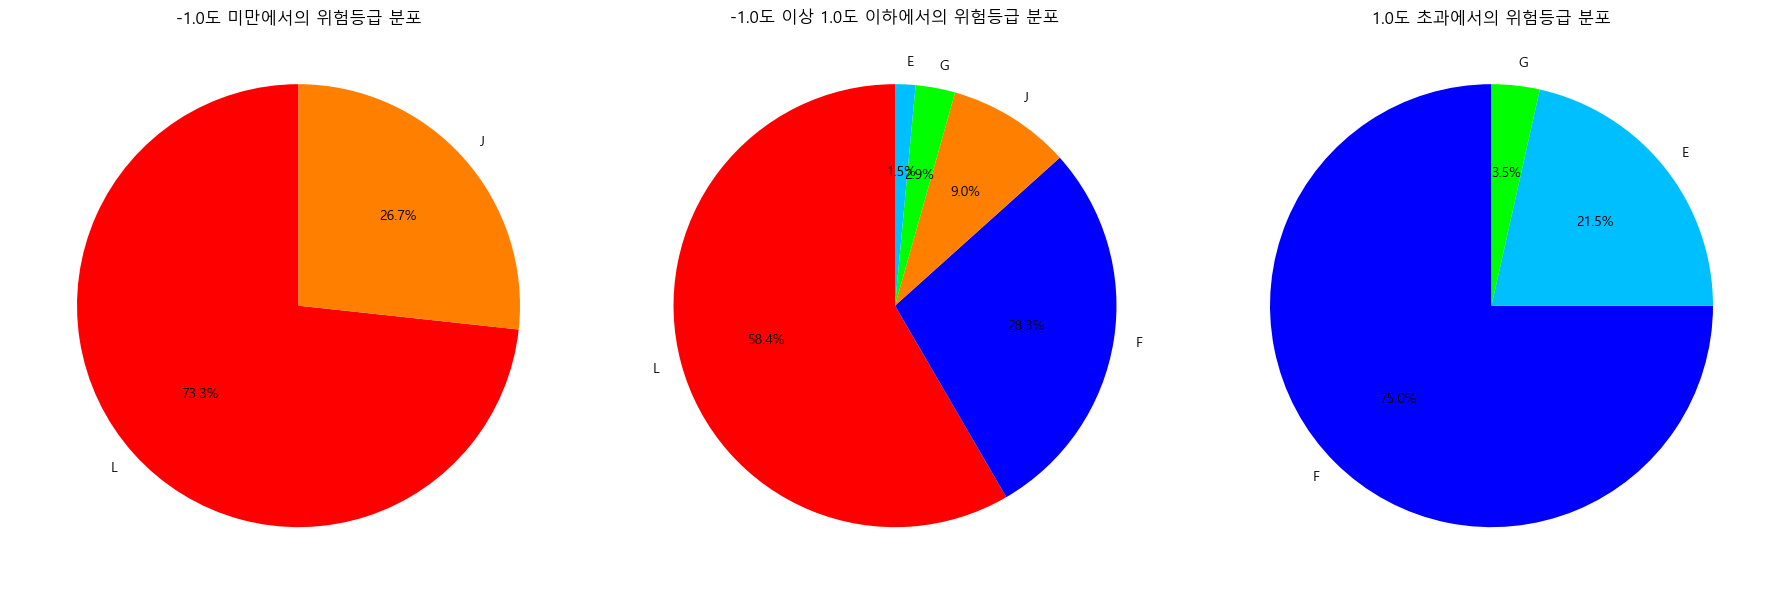

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# pickle 파일 로드
with open("temperature_data.pkl", "rb") as f:
    data = pickle.load(f)

temp_00 = data["temp_00"]
temp_01 = data["temp_01"]

plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우에서 사용 (리눅스에서는 'NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 제대로 표시되게 설정

# 데이터 로드
df = pd.read_csv("도로위험상황예보.csv")

# 필요한 열만 선택
df = df[['RSK_ELMN_GRD', 'AIRTP']]  

# 첫 번째 인덱스를 제외하고 데이터 저장
df = df.iloc[1:]

# 결측값 제거
df = df.dropna(subset=['RSK_ELMN_GRD', 'AIRTP'])  # 결측값 제거

# AIRTP 열을 숫자형으로 변환
df['AIRTP'] = pd.to_numeric(df['AIRTP'], errors='coerce')

# -1도 이하
df_below_mfive = df[df['AIRTP'] < temp_01]

# -1도 이상 0도 이하
df_below_zero = df[(df['AIRTP'] <= temp_00) & (df['AIRTP'] >= temp_01)]

# 0도 초과 10도 이하
df_below_five = df[(df['AIRTP'] > temp_00)]

# 위험 요소 등급별 빈도 세기
grade_counts_00 = df_below_zero['RSK_ELMN_GRD'].value_counts()
grade_counts_01 = df_below_mfive['RSK_ELMN_GRD'].value_counts()
grade_counts_02 = df_below_five['RSK_ELMN_GRD'].value_counts()

# 컬러 매핑
color_mapping = {
    'L': '#FF0000',    # 가장 높은 위험도 -> 빨강
    'J': '#FF7F00',    # 두번째 위험도 -> 주황
    'G': '#00FF00',    # 낮은 위험도 -> 초록
    'F': '#0000FF',    # 아주 낮은 위험도 -> 파랑 
    'E': '#00BFFF'     # 가장 낮은 위험도 -> 하늘
}

# 파이 차트를 하나의 화면에 3개 그리기 위한 함수
def plot_pie_chart_subplot(grade_counts, title, ax):
    colors = [color_mapping.get(grade, "gray") for grade in grade_counts.index]
    
    ax.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.set_title(title)
    ax.axis('equal')  # 원형으로 표시되도록 설정

# Subplot을 사용하여 3개의 파이 차트를 나란히 그리기
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 한 줄에 3개 차트 배치

plot_pie_chart_subplot(grade_counts_01, f"{temp_01}도 미만에서의 위험등급 분포", axes[0])
plot_pie_chart_subplot(grade_counts_00, f"{temp_01}도 이상 {temp_00}도 이하에서의 위험등급 분포", axes[1])
plot_pie_chart_subplot(grade_counts_02, f"{temp_00}도 초과에서의 위험등급 분포", axes[2])

# 그래프 표시
plt.tight_layout()
plt.show()

## 기온 구간별 위험 요소 등급 분포 분석 바차트

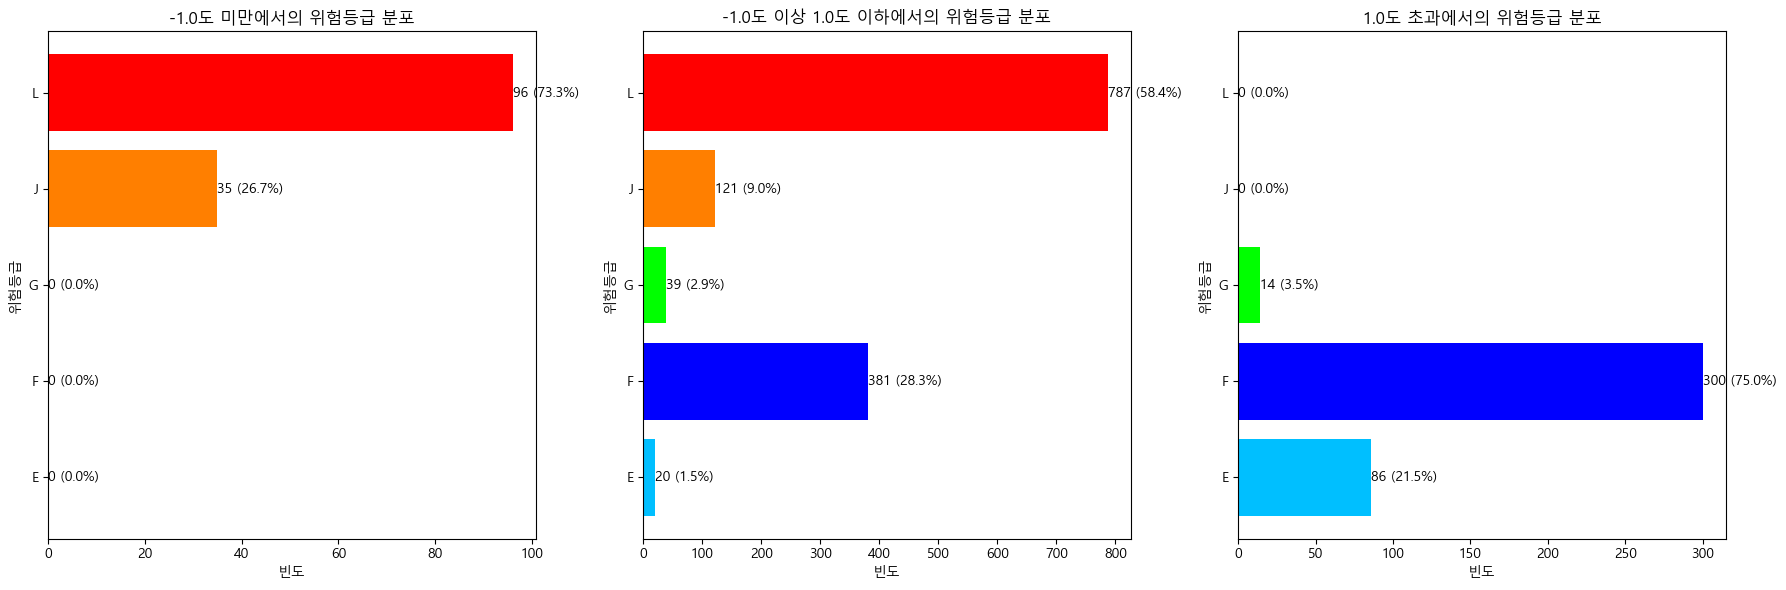

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# pickle 파일 로드
with open("temperature_data.pkl", "rb") as f:
    data = pickle.load(f)

temp_00 = data["temp_00"] #저위험
temp_01 = data["temp_01"] #위험

# 데이터 로드
df = pd.read_csv("도로위험상황예보.csv")

# 필요한 열만 선택
df = df[['RSK_ELMN_GRD', 'AIRTP']]  

# 첫 번째 인덱스를 제외하고 데이터 저장
df = df.iloc[1:]

# 결측값 제거
df = df.dropna(subset=['RSK_ELMN_GRD', 'AIRTP'])  # 결측값 제거

# AIRTP 열을 숫자형으로 변환
df['AIRTP'] = pd.to_numeric(df['AIRTP'], errors='coerce')

# -1도 이하
df_below_mfive = df[df['AIRTP'] < temp_01]

# -1도 이상 0도 이하
df_below_zero = df[(df['AIRTP'] <= temp_00) & (df['AIRTP'] >= temp_01)]

# 0도 초과 10도 이하
df_below_five = df[(df['AIRTP'] > temp_00)]

# 위험 요소 등급별 빈도 세기
grade_counts_00 = df_below_zero['RSK_ELMN_GRD'].value_counts()
grade_counts_01 = df_below_mfive['RSK_ELMN_GRD'].value_counts()
grade_counts_02 = df_below_five['RSK_ELMN_GRD'].value_counts()

# 원하는 순서로 정렬
desired_order = ['E', 'F', 'G', 'J', 'L']
grade_counts_00 = grade_counts_00.reindex(desired_order, fill_value=0)
grade_counts_01 = grade_counts_01.reindex(desired_order, fill_value=0)
grade_counts_02 = grade_counts_02.reindex(desired_order, fill_value=0)

# 컬러 매핑
color_mapping = {
    'L': '#FF0000',    # 가장 높은 위험도 -> 빨강
    'J': '#FF7F00',    # 두번째 위험도 -> 주황
    'G': '#00FF00',    # 낮은 위험도 -> 초록
    'F': '#0000FF',    # 아주 낮은 위험도 -> 파랑 
    'E': '#00BFFF'     # 가장 낮은 위험도 -> 하늘
}

# 가로 바 차트를 하나의 화면에 3개 그리기 위한 함수
def plot_horizontal_bar_chart(grade_counts, title, ax):
    colors = [color_mapping.get(grade, "gray") for grade in grade_counts.index]
    
    # 가로 바 차트 그리기
    bars = ax.barh(grade_counts.index, grade_counts.values, color=colors)
    ax.set_title(title)
    ax.set_xlabel('빈도')
    ax.set_ylabel('위험등급')

    # 각 막대 옆에 값과 퍼센트 표시
    total = grade_counts.sum()
    for bar in bars:
        width = bar.get_width()
        percent = (width / total) * 100 if total > 0 else 0
        ax.text(width, bar.get_y() + bar.get_height()/2, f'{int(width)} ({percent:.1f}%)', 
                ha='left', va='center')

# Subplot을 사용하여 3개의 가로 바 차트를 나란히 그리기
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 한 줄에 3개 차트 배치

plot_horizontal_bar_chart(grade_counts_01, f"{temp_01}도 미만에서의 위험등급 분포", axes[0])
plot_horizontal_bar_chart(grade_counts_00, f"{temp_01}도 이상 {temp_00}도 이하에서의 위험등급 분포", axes[1])
plot_horizontal_bar_chart(grade_counts_02, f"{temp_00}도 초과에서의 위험등급 분포", axes[2])

# 그래프 표시
plt.tight_layout()
plt.show()


In [11]:
import pickle

# pickle 파일 로드
with open("temperature_data.pkl", "rb") as f:
    data = pickle.load(f)

temp_00 = data["temp_00"] #저위험
temp_01 = data["temp_01"] #위험
temp_02 = data["temp_02"] #고위험

print(temp_00)
print(temp_01)
print(temp_02)

1.0
0.0
-1.0
